In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
np.random.seed(1)

mean = np.array([5, 6])
cov = np.array([[1.5, 0], [0, 1.5]])
data = np.random.multivariate_normal(mean, cov, 500)

mean2 = np.array([1, 1])
cov2 = np.array([[2, 0.2], [0.2, 2]])
data2 = np.random.multivariate_normal(mean2, cov2, 500)

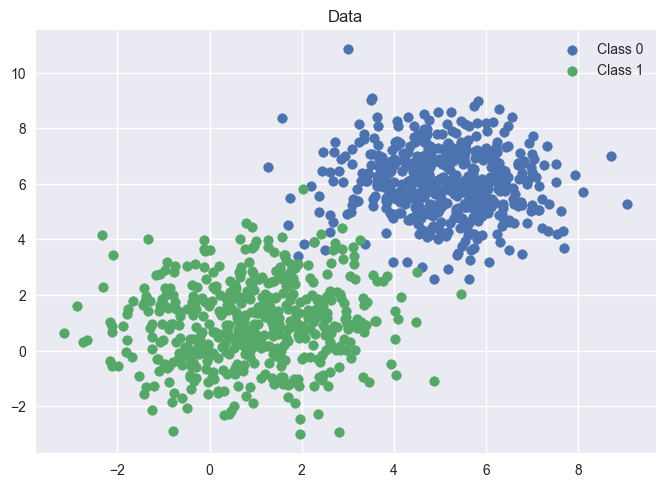

In [142]:
plt.scatter(data[:, 0], data[:, 1], label="Class 0")
plt.scatter(data2[:, 0] , data2[:, 1], label="Class 1")
plt.title("Data")
plt.legend()
plt.show()

In [143]:
Data = np.zeros((1000, 3))

In [144]:
Data[:500, :2] = data
Data[500:, :2] = data2
Data[500:, -1] = 1

In [145]:
Data.shape

(1000, 3)

In [146]:
np.random.shuffle(Data)
Data

array([[4.66215895, 7.50515705, 0.        ],
       [5.20167269, 6.95306483, 0.        ],
       [0.47684621, 0.444115  , 1.        ],
       ...,
       [3.6858925 , 6.60644297, 0.        ],
       [5.34977161, 7.0840721 , 0.        ],
       [6.56002604, 8.40919778, 0.        ]])

In [147]:
split = int(0.8 * Data.shape[0])
trainX = Data[:split,:-1]
trainY = Data[:split, -1]

testX = Data[split:,:-1]
testY = Data[split:, -1]

In [148]:
plt.style.use('seaborn-v0_8')

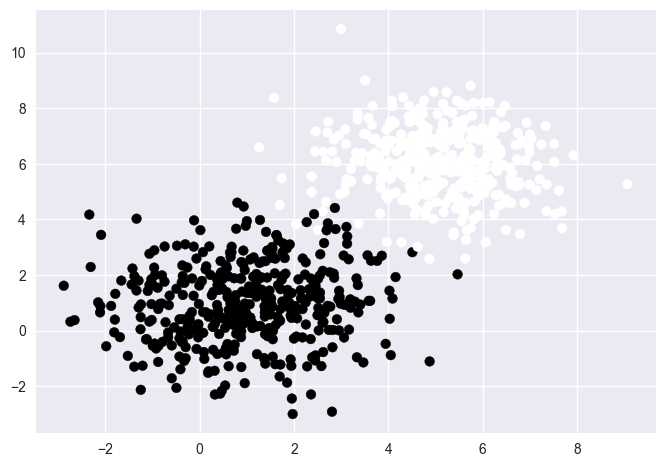

In [149]:
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY)

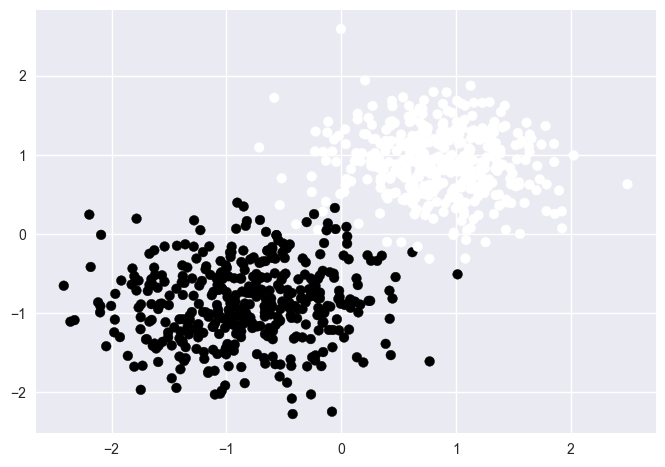

In [150]:
xmean = np.mean(trainX, axis=0)
xstd = np.std(trainX, axis=0)

trainX = (trainX - xmean) / xstd
testX = (testX - xmean) / xstd
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY)

In [151]:
ones = np.ones((trainX.shape[0], 1))
trainX = np.concatenate((ones, trainX), axis=1)
print(trainX.shape, trainY.shape)

(800, 3) (800,)


In [152]:
trainY = trainY.reshape((-1, 1))
trainY.shape

(800, 1)

In [153]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [154]:
def error(X, Y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = -1 * np.sum((Y * np.log(y_)) + ((1 - Y) * np.log(1 - y_)))
    return e / m

In [155]:
def gradient(X, Y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    grad = - np.dot(X.T, (Y - y_))
    return grad / m

In [156]:
def gradientDescent(X, Y, lr = 0.1, iters = 1000):
    n = X.shape[1]
    theta = np.zeros((n, 1))
    el = []
    for i in range(iters):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        el.append(e)
        theta = theta - lr * grad
        
    return theta, el

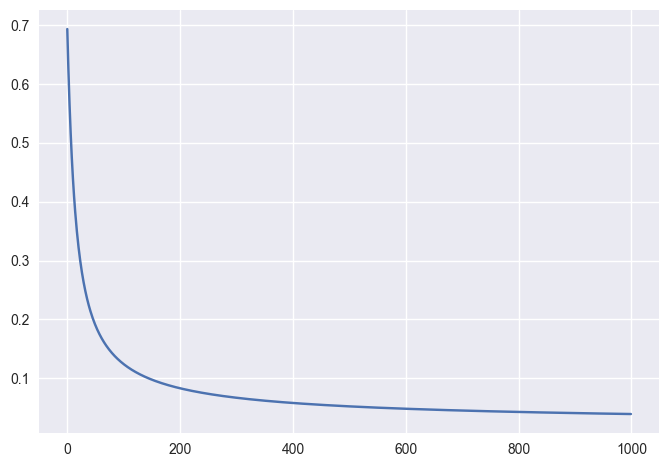

In [157]:
theta, errorlist = gradientDescent(trainX, trainY)
# print(theta, errorlist)
plt.plot(errorlist)

(800,)


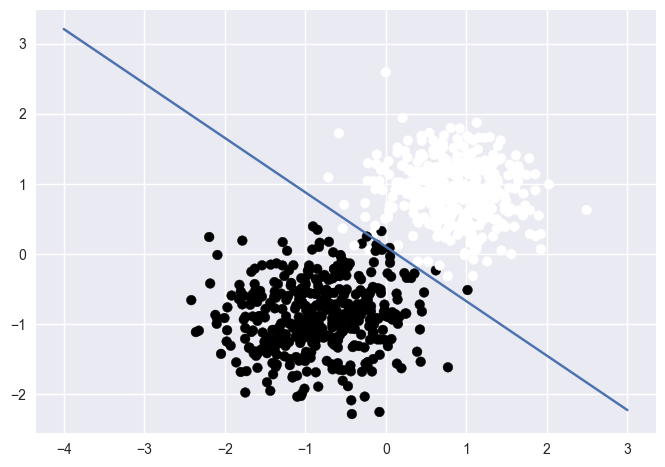

In [161]:
x1 = np.arange(-4, 4)
x2 = -(theta[0] + theta[1] * x1) / theta[2]

trainY = trainY.reshape((-1,))
print(trainY.shape)
plt.scatter(trainX[:, 1], trainX[:, 2], c=trainY)
plt.plot(x1, x2)
plt.show()

In [163]:
ones = np.ones((testX.shape[0], 1))
testX = np.hstack((ones, testX))
testX.shape

(200, 3)

In [165]:
def predict(X, theta):
    y_ = hypothesis(X, theta)
    output = np.zeros(y_.shape)
    output[y_ >= 0.5] = 1
    output = output.astype('int')
    return output

In [166]:
predY = predict(testX, theta)
predY

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [180]:
def accuracy(y1, y2):
    y1 = y1.astype('int')
    y2 = y2.astype('int')
    return 100 * (np.sum(y1 == y2) / y1.shape[0])
    

In [181]:
testY = testY.reshape((-1, 1))
acc = accuracy(predY, testY)
acc

98.0

In [179]:
predYtrain = predict(trainX, theta)
predYtrain
trainY = trainY.reshape((-1, 1))

In [182]:
acc = accuracy(predYtrain, trainY)
acc

99.125